# Loads the processed h5 file and plots data
### the minimalist way (using analysis.py)

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
import sys
import os
from glob import glob

sys.path.insert(0, '../src/')
from data_analysis import *
from integrators import *
from analysis import *

In [2]:
# constants
detector_distance = 0.12
energy = 9.5

# analysis parameters
iq_thr = 0.8
q_min, q_max = 20,30

### look at all runs

In [3]:
runs = glob('/sf/bernina/data/p17743/res/work/hdf5/run*h5')
for r in runs:
    print(os.path.basename(r))

run0081_droplets_10um_20mm.h5
run0027_droplets_10um_4mm.h5
run0106_droplets_10um_36mm.h5
run0007_jet10um_RT.h5
run0080_droplets_10um_20mm.h5
run0102_droplets_10um_32mm.h5
run0070_droplets_10um_4mm.h5
run0068_droplets_10um_64mm_tmp.h5
run0036_droplets_10um_4mm.h5
run0033_droplets_10um_4mm.h5
run0065_droplets_10um_56mm.h5
run0076_droplets_10um_16mm.h5
run0010_jet10um_RT.h5
run0097_droplets_10um_28mm.h5
run0100_droplets_10um_32mm.h5
run0041_droplets_10um_8mm.h5
run0020_droplets_10um_2mm.h5
run0103_droplets_10um_36mm.h5
run0034_droplets_10um_4mm.h5
run0087_droplets_10um_24mm.h5
run0054_droplets_10um_24mm.h5
run0042_droplets_10um_12mm.h5
run0063_droplets_10um_48mm.h5
run0094_droplets_10um_28mm.h5
run0000_test01.h5
run0039_droplets_10um_8mm.h5
run0050_droplets_10um_20mm.h5
run0075_droplets_10um_12mm.h5
run0099_droplets_10um_32mm.h5
run0071_droplets_10um_8mm.h5
run0105_droplets_10um_36mm.h5
run0085_droplets_10um_24mm.h5
run0049_droplets_10um_20mm.h5
run0095_droplets_10um_28mm.h5
run0096_dropl

### load  and analyse data

In [9]:
hit_rates = []
for r in runs:
    
    try:

        run = os.path.basename(r)[3:-3]
        print(run)

        # load data
        img,Iq,r,nshots,i0,laser_i0,laser_on,event_ID = load_processed_data(run)

        # convert q_scale
        q = q_scale(r,detector_distance=detector_distance)

        # convert intensity to photon/pix
        img/=energy
        Iq /=energy
        i0 /=energy

        # normalise to i0
        Iq_norm = np.zeros(Iq.shape)
        i0_avg = np.average(i0)
        norm = i0/i0_avg
        for i in range(int(nshots)):
            Iq_norm[i]=Iq[i]/norm[i]

        # find hits
        metric,hits = find_hits(Iq_norm,threshold=iq_thr)
        hit_rate =np.sum(hits)/nshots

        # pump probe signal
        hit_avg,miss_avg,diff_signal =  pump_probe_signal(Iq,hits,laser_on)

        hit_rates.append( (run[:4], float(hit_rate)) )
        
    except:
        print('pass')
        pass

0081_droplets_10um_20mm
run0081_droplets_10um_20mm: 18000 shots
0027_droplets_10um_4mm
pass
0106_droplets_10um_36mm
pass
0007_jet10um_RT
pass
0080_droplets_10um_20mm
pass
0102_droplets_10um_32mm
pass
0070_droplets_10um_4mm
pass
0068_droplets_10um_64mm_tmp
run0068_droplets_10um_64mm_tmp: 18000 shots
0036_droplets_10um_4mm
run0036_droplets_10um_4mm: 18000 shots


/sf/bernina/anaconda/4.4.0/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in true_divide
/sf/bernina/anaconda/4.4.0/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in true_divide
../src/analysis.py:55: RuntimeWarning: invalid value encountered in greater
  hits = metric>threshold
/sf/bernina/anaconda/4.4.0/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/sf/bernina/anaconda/4.4.0/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


0033_droplets_10um_4mm
run0033_droplets_10um_4mm: 18000 shots
0065_droplets_10um_56mm
run0065_droplets_10um_56mm: 12000 shots
0076_droplets_10um_16mm
run0076_droplets_10um_16mm: 18000 shots
0010_jet10um_RT
pass
0097_droplets_10um_28mm
pass
0100_droplets_10um_32mm
pass
0041_droplets_10um_8mm
run0041_droplets_10um_8mm: 18000 shots
0020_droplets_10um_2mm
run0020_droplets_10um_2mm: 18000 shots
0103_droplets_10um_36mm
pass
0034_droplets_10um_4mm
pass
0087_droplets_10um_24mm
pass
0054_droplets_10um_24mm
run0054_droplets_10um_24mm: 18000 shots
0042_droplets_10um_12mm
run0042_droplets_10um_12mm: 1000 shots
0063_droplets_10um_48mm
run0063_droplets_10um_48mm: 18000 shots
0094_droplets_10um_28mm
pass
0000_test01
pass
0039_droplets_10um_8mm
run0039_droplets_10um_8mm: 1000 shots
0050_droplets_10um_20mm
run0050_droplets_10um_20mm: 18000 shots
0075_droplets_10um_12mm
run0075_droplets_10um_12mm: 18000 shots
0099_droplets_10um_32mm
pass
0071_droplets_10um_8mm
pass
0105_droplets_10um_36mm
pass
0085_drop

In [5]:
shr = sorted(hit_rates)
for hr in shr:
    print(hr[0], '%2.2f' % round(hr[1] * 100, 2), '%')

0018 0.00 %
0020 16.37 %
0033 4.58 %
0035 2.08 %
0036 1.35 %
0037 5.26 %
0038 6.53 %
0039 1.90 %
0040 2.08 %
0041 2.05 %
0042 0.70 %
0043 0.52 %
0044 0.52 %
0045 0.30 %
0046 0.41 %
0047 0.34 %
0048 0.40 %
0049 0.22 %
0050 0.21 %
0051 0.22 %
0052 0.30 %
0053 0.15 %
0054 0.18 %
0055 0.20 %
0056 0.12 %
0057 0.10 %
0058 0.30 %
0059 0.08 %
0060 0.06 %
0061 0.20 %
0062 0.05 %
0063 0.04 %
0064 0.00 %
0065 0.03 %
0066 0.01 %
0067 0.10 %
0068 0.00 %
0068 0.01 %
0069 22.16 %
0073 2.81 %
0074 3.91 %
0075 3.44 %
0076 1.02 %
0077 1.23 %
0078 2.17 %
0079 1.07 %
0081 1.09 %
0082 0.63 %
0083 0.56 %
0084 0.40 %
0088 0.80 %
0089 0.80 %


In [6]:
n = len(shr)
x = np.zeros(n)
y = np.zeros(n)

<IPython.core.display.Javascript object>


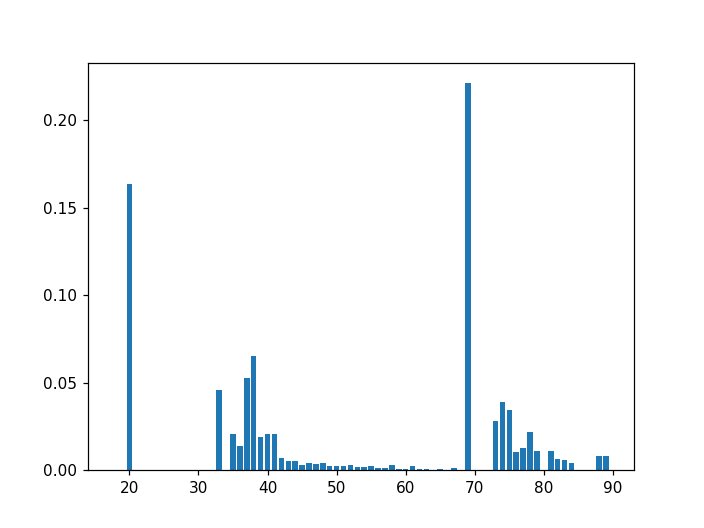

In [7]:
i=0
for hr in shr:
    x[i] = hr[0]
    y[i] = hr[1]
    #print(hr[0], '%2.2f' % round(hr[1] * 100, 2), '%')
    i+=1
    
plt.figure()
plt.bar(x,y)
plt.show()